In [ ]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import ks_2samp



In [ ]:
def get_data(split: str):
    df = pd.read_csv(f'diamonds_{split}.csv')
    df = df.rename(columns = {'Unnamed: 0': 'Index'})
    # print(df.dtypes)
    x = df.drop(['Index', 'price'], axis = 1) # index col not needed
    # print(x.describe())
    y = df['price']
    # print(y.describe())
    # x_arr = x.to_numpy()
    # y_arr = y.to_numpy()
    # # print(x_arr[1])
    # print(y_arr[0])
    return x, y

In [ ]:

def ohe(df, col: str):
  visited = []
  for val in df[col]:
    if val not in visited:
      visited.append(val)
  for val in visited:
    if f'{val}_{col}' not in df.columns:
      df[f'{val}_{col}'] = df[col].apply(lambda x: 1 if x == val else 0)

  df = df.drop(col, axis = 1)
  return df

In [ ]:
def feature_engineering(split):
  x_train, y_train = get_data('train')
  x_train = ohe(x_train, 'color')
  x_train = ohe(x_train, 'cut')
  x_train = ohe(x_train, 'clarity')
  ks= {}
  if split != "train":


    x_split, y_split = get_data(split)
    x_split = ohe(x_split, 'color')
    x_split = ohe(x_split, 'cut')
    x_split = ohe(x_split, 'clarity')
    train = pd.concat([x_train, y_train], axis = 1)
    val = pd.concat([x_split, y_split], axis = 1)
    for col in train.columns:
      stat, p = ks_2samp(train[col], val[col])
      ks[col] = f'statistic: {stat}', f'p-value: {p}'
  else:
    x_split, y_split = x_train, y_train

  for k, v in ks.items():
    _, p = v
    p = float(p.split(': ')[1])
    if p < 0.05:
      print('different distributions')
      raise Exception

  print('looks good')
  scaler = StandardScaler()
  scaler.fit(y_train.to_numpy().reshape(-1, 1))
  y_split = scaler.transform(y_split.to_numpy().reshape(-1, 1))
  n_feats = x_split.shape[1]
  # print(n_feats)
  x_split = x_split.to_numpy()
  return x_split, y_split, n_feats, ks


In [ ]:

feature_engineering('val')

looks good


(array([[ 0.29, 62.8 , 44.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.3 , 63.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.01, 62.  , 57.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.3 , 61.8 , 55.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.16, 61.2 , 58.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.34, 62.9 , 55.  , ...,  0.  ,  0.  ,  0.  ]]),
 array([[-0.86791129],
        [-0.76189848],
        [ 0.33096516],
        ...,
        [-0.81780072],
        [ 1.59153552],
        [-0.81452717]]),
 26,
 {'carat': ('statistic: 0.010729514275120478', 'p-value: 0.6349713469900817'),
  'depth': ('statistic: 0.013116425658138642', 'p-value: 0.3781841010821523'),
  'table': ('statistic: 0.00426399703374114', 'p-value: 0.9999924703974541'),
  'x': ('statistic: 0.01068316648127543', 'p-value: 0.6403816964081891'),
  'y': ('statistic: 0.009709862810530212', 'p-value: 0.7527413041865041'),
  'z': ('statistic: 0.011123470522803103', 'p-value: 0.5892139525783757'),
  'F_color': ('statistic:

looks good
looks good

Final Polynomial Regression Results (Normalized Target):
Polynomial Degree: 2
Mean Squared Error (Normalized): 0.4305
R² Score (Normalized): 0.5877


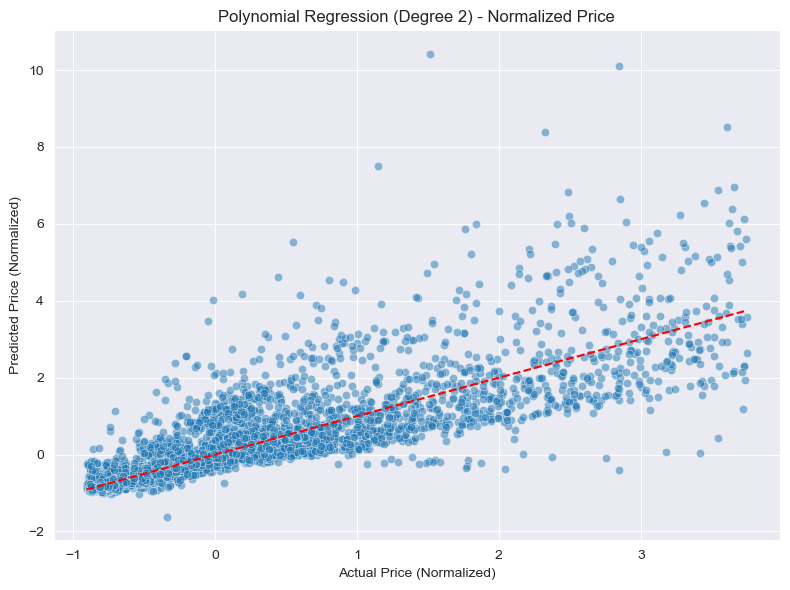

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Run feature engineering for train and test
X_train, y_train, n_feats, _ = feature_engineering('train')
X_test, y_test, _, _ = feature_engineering('test')

# Polynomial features
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test
y_pred = model.predict(X_test_poly)

# Calculate normalized MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"\nFinal Polynomial Regression Results (Normalized Target):")
print(f"Polynomial Degree: {degree}")
print(f"Mean Squared Error (Normalized): {mse:.4f}")
print(f"R² Score (Normalized): {r2:.4f}")

# Plot predicted vs actual (still in normalized scale)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (Normalized)")
plt.ylabel("Predicted Price (Normalized)")
plt.title(f"Polynomial Regression (Degree {degree}) - Normalized Price")
plt.grid(True)
plt.tight_layout()
plt.show()
# need to do on validation first


In [ ]:
# Get training and validation sets
X_train, y_train, _, _ = feature_engineering("train")
X_val, y_val, _, _ = feature_engineering("val")

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Validate model
y_val_pred = model.predict(X_val_poly)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val:.4f}")
print(f"Validation R²: {r2_val:.4f}")


looks good
looks good
Validation MSE: 0.3030
Validation R²: 0.7107
